<a href="https://colab.research.google.com/github/fazlencodes/Facebook-Posts-Data-Analysis/blob/main/facebook_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
#read the json file into DataFrame
from google.colab import files

upload = files.upload()

Saving your_posts_1.json to your_posts_1 (1).json


In [ ]:
!ls

 facebook-100005341215037.zip  'your_posts_1 (1).json'
 sample_data		        your_posts_1.json


In [ ]:
data = pd.read_json('your_posts_1.json')
data.head()

,timestamp,attachments,data,title,tags
0,2021-05-28 07:01:54,[{'data': [{'for_sale_item': {'title': 'buku c...,[],Fazlen Saleha posted in Komuniti Damansara Damai.,NaN
1,2021-05-28 06:43:23,[{'data': [{'for_sale_item': {'title': 'Buku s...,[],Fazlen Saleha posted in Komuniti Damansara Damai.,NaN
2,2021-05-28 06:39:55,[{'data': [{'for_sale_item': {'title': 'Buku u...,[],Fazlen Saleha posted in Komuniti Damansara Damai.,NaN
3,2021-05-27 02:34:51,NaN,[{'post': 'Hb'}],Fazlen Saleha wrote on Browny Bean Bear's time...,NaN
4,2021-05-19 02:24:03,NaN,[{'post': 'Happy birthday ð'}],Fazlen Saleha wrote on Mohamed Bysul Khan's ti...,NaN


# converting it to a datetime object using to_datetime()

In [ ]:
# rename the timestamp column
data.rename(columns={'timestamp': 'date'}, inplace=True)
data

,date,attachments,data,title,tags
0,2021-05-28 07:01:54,[{'data': [{'for_sale_item': {'title': 'buku c...,[],Fazlen Saleha posted in Komuniti Damansara Damai.,NaN
1,2021-05-28 06:43:23,[{'data': [{'for_sale_item': {'title': 'Buku s...,[],Fazlen Saleha posted in Komuniti Damansara Damai.,NaN
2,2021-05-28 06:39:55,[{'data': [{'for_sale_item': {'title': 'Buku u...,[],Fazlen Saleha posted in Komuniti Damansara Damai.,NaN
3,2021-05-27 02:34:51,NaN,[{'post': 'Hb'}],Fazlen Saleha wrote on Browny Bean Bear's time...,NaN
4,2021-05-19 02:24:03,NaN,[{'post': 'Happy birthday ð'}],Fazlen Saleha wrote on Mohamed Bysul Khan's ti...,NaN
...,...,...,...,...,...
900,2014-05-25 06:49:00,[{'data': [{'external_context': {'url': 'http:...,[{'update_timestamp': 1401000540}],NaN,NaN
901,2014-05-25 06:48:29,NaN,[{'post': 'Previous account closed.. Because o...,Fazlen Saleha updated her status.,NaN
902,2014-05-25 06:25:47,[{'data': [{'external_context': {'url': 'http:...,[{'update_timestamp': 1400999147}],NaN,NaN
903,2014-05-25 06:16:50,[{'data': [{'external_context': {'name': 'How ...,[],Fazlen Saleha likes an article.,NaN


In [ ]:
#drop some unnecessary columns
data = data.drop(['attachments','title','tags'],axis=1)
# data = data.drop(['attachments', 'title', 'tags'], axis=1)

In [ ]:
# making sure it's datetime format
pd.to_datetime(data['date'])
data.head(3)

,date,data
0,2021-05-28 07:01:54,[]
1,2021-05-28 06:43:23,[]
2,2021-05-28 06:39:55,[]


In [ ]:
data.shape

(905, 2)

In [ ]:
data.tail()

,date,data
900,2014-05-25 06:49:00,[{'update_timestamp': 1401000540}]
901,2014-05-25 06:48:29,[{'post': 'Previous account closed.. Because o...
902,2014-05-25 06:25:47,[{'update_timestamp': 1400999147}]
903,2014-05-25 06:16:50,[]
904,2014-05-24 11:40:01,[{'post': 'LoL . :3'}]


based on the data i have made my first post on 2014-05-24

### Step 3: Figuring Out Monthly Post Count (the frequency)
    
 >    1. Set the date column as the index of our DataFrame
 >    2. Resample the data by month, counting how many posts occur in each month.

1. Select the column we want to resample by — in this case, is the data column.
2. Use the .resample() function with the argument 'MS' (for "Month Start") to resample our data by month.
3. Use .size() to specify what we want to measure each month — in this case, the number of rows (i.e., posts) with a post date that fall within that month.
4. Assign the resulting Series to a variable called post_counts.

In [ ]:
'''

Resample time-series data.

Convenience method for frequency conversion and resampling of time series. 
Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), 
or pass datetime-like values to the on or level keyword.
'''



data = data.set_index('date') # making the date as our index

post_counts= data['data'].resample('MS').size()

post_counts
'''Note that months with no posts have been correctly counted as 0 rather than simply skipped. 
That's one of the reasons why using resample(), which is designed to work with time series, 
is better for this kind of task than using something like groupby(), where it's easy to skip months with no data if we're not careful.'''

date
2014-05-01     9
2014-06-01    11
2014-07-01    20
2014-08-01    31
2014-09-01    16
              ..
2021-01-01    13
2021-02-01     4
2021-03-01     3
2021-04-01     4
2021-05-01     9
Freq: MS, Name: data, Length: 85, dtype: int64

# Step 4: Visualize Your Facebook Usage

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

In [ ]:
# set x labels
x_labels = post_counts.index

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


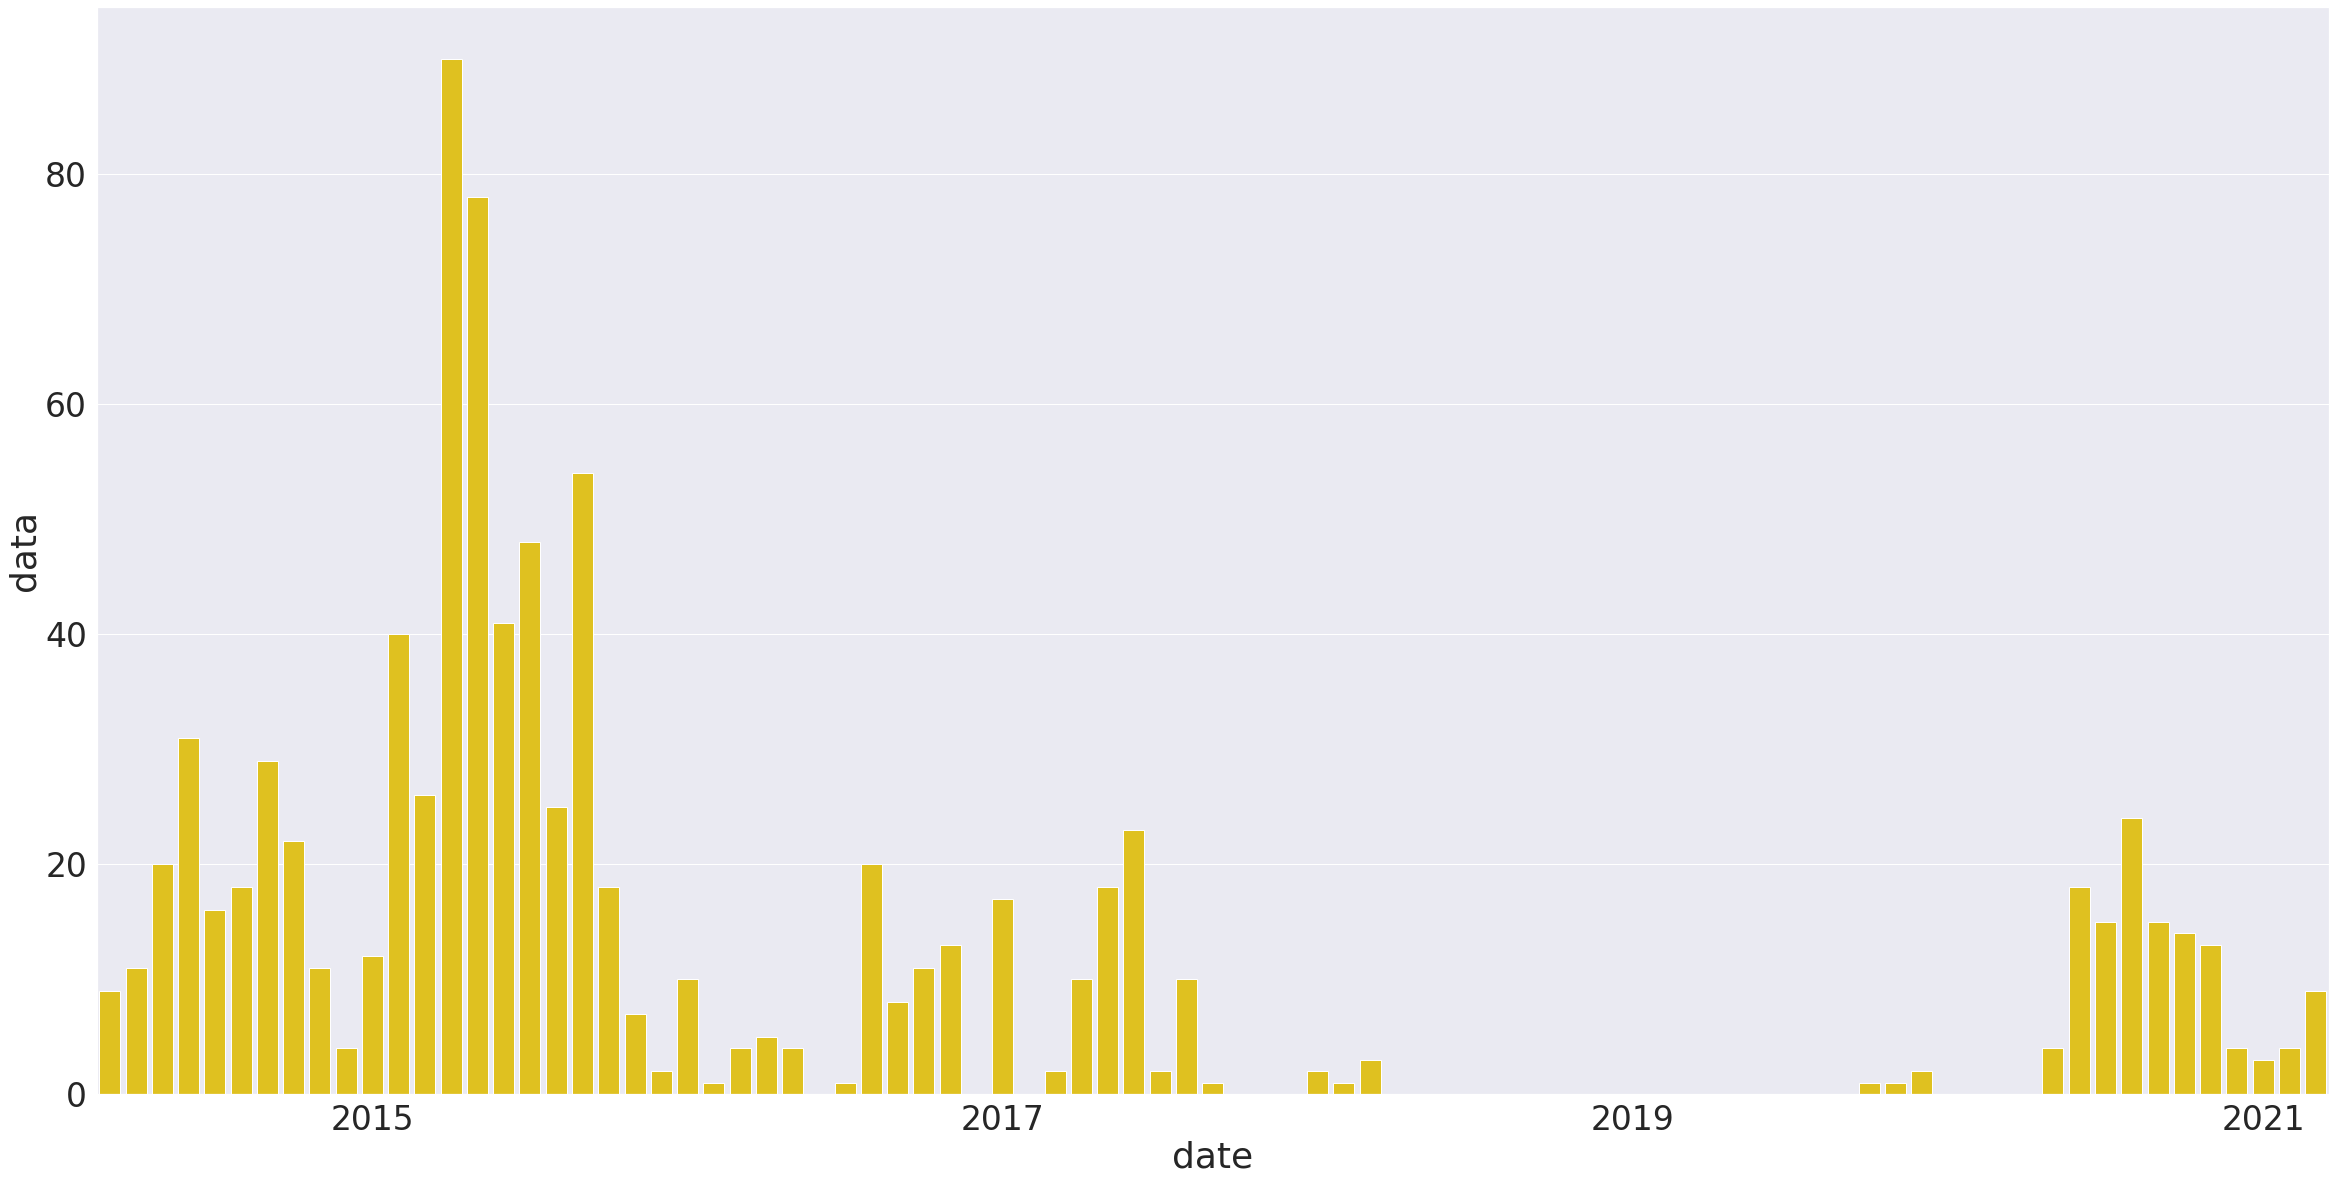

In [ ]:
#create bar plot
sns.barplot(x_labels, post_counts, color="gold")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()